# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units ="imperial"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units="metric"&q='

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count = 0

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ta`u
Processing Record 0 of Set 1 | port-aux-francais
Processing Record 0 of Set 1 | jamestown
Processing Record 0 of Set 1 | padam
City not found. Skipping...
Processing Record 0 of Set 1 | taiohae
City not found. Skipping...
Processing Record 0 of Set 1 | grytviken
Processing Record 0 of Set 1 | blackmans bay
Processing Record 0 of Set 1 | edinburgh of the seven seas
Processing Record 0 of Set 1 | broome
Processing Record 0 of Set 1 | queenstown
Processing Record 0 of Set 1 | yeniseysk
Processing Record 0 of Set 1 | adamstown
Processing Record 0 of Set 1 | papatowai
Processing Record 0 of Set 1 | scottburgh
Processing Record 0 of Set 1 | huanuco
Processing Record 0 of Set 1 | chui
Processing Record 0 of Set 1 | west island
Processing Record 0 of Set 1 | ilulissat
Processing Record 0 of Set 1 | georgetown
Processing Record 0 of Set 1 | cestos city
Processing Record 0 of Set 1 | qaqortoq
Processi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

""


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ta`u,-14.2336,-169.5144,300.31,76,3,4.84,AS,1691611207
1,port-aux-francais,-49.3500,70.2167,275.38,82,97,13.12,TF,1691611209
2,jamestown,42.0970,-79.2353,300.38,56,0,7.72,US,1691610959
3,grytviken,-54.2811,-36.5092,263.45,64,0,3.05,GS,1691611210
4,blackmans bay,-43.0167,147.3167,285.78,69,100,2.08,AU,1691611213


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

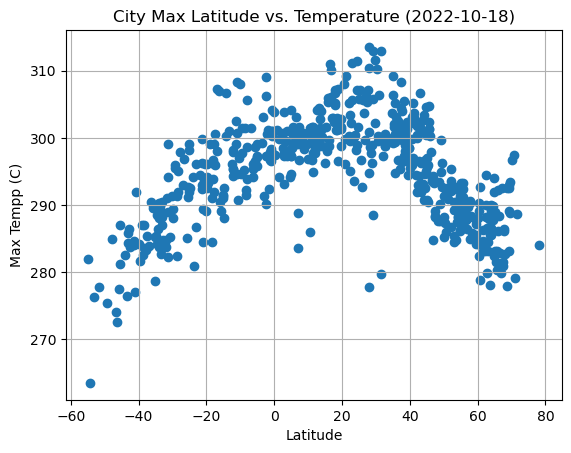

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Tempp (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()
plt.show()

#### Latitude Vs. Humidity

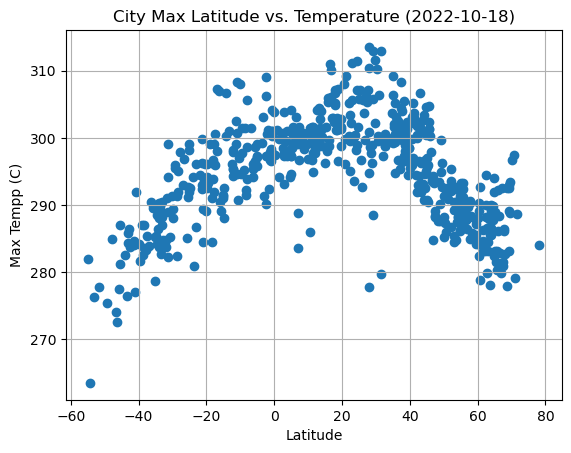

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Tempp (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

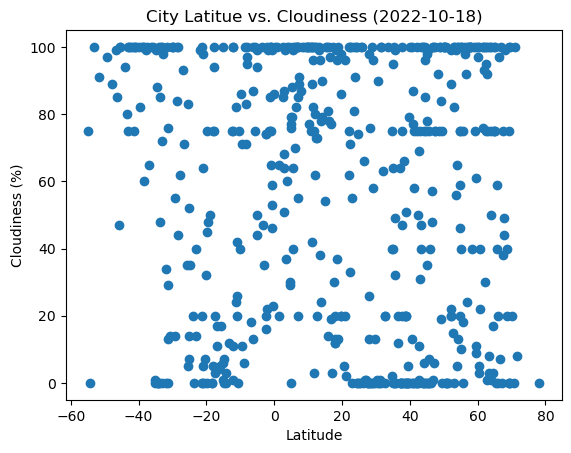

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitue vs. Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

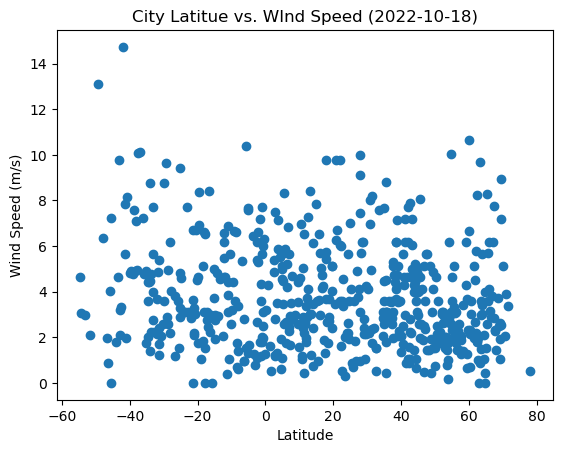

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitue vs. WInd Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
import scipy.stats as st
from scipy.stats import linregress

def regression(x_values,y_values):
    cor = st.pearsonr(x_values,y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    print(f'The r^2 values is {rvalue**2}')
    plt.plot(x_values,regress_values,"r-")
    
    return(line_eq)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,jamestown,42.0970,-79.2353,300.38,56,0,7.72,US,1691610959
6,broome,42.2506,-75.8330,299.92,74,0,0.89,US,1691611214
8,yeniseysk,58.4497,92.1703,285.77,88,40,1.41,RU,1691610961
15,ilulissat,69.2167,-51.1000,283.16,50,75,1.03,GL,1691611221
16,georgetown,5.4112,100.3354,300.38,94,40,2.57,MY,1691611039


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ta`u,-14.2336,-169.5144,300.31,76,3,4.84,AS,1691611207
1,port-aux-francais,-49.3500,70.2167,275.38,82,97,13.12,TF,1691611209
3,grytviken,-54.2811,-36.5092,263.45,64,0,3.05,GS,1691611210
4,blackmans bay,-43.0167,147.3167,285.78,69,100,2.08,AU,1691611213
5,edinburgh of the seven seas,-37.0676,-12.3116,283.85,62,65,10.11,SH,1691611213


###  Temperature vs. Latitude Linear Regression Plot

The r^2 values is 0.42523366316315775


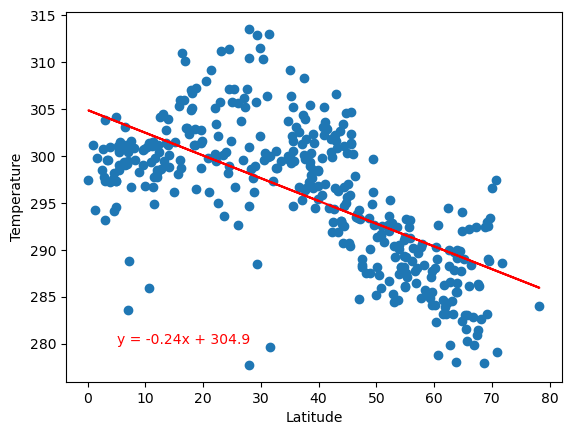

In [21]:
# Linear regression on Northern Hemisphere
latitude_n = northern_hemi_df["Lat"].values
temperature_n = northern_hemi_df["Max Temp"].values

line_eq = regression(latitude_n, temperature_n)


plt.annotate(line_eq, (5,280), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

The r^2 values is 0.6285795829319305


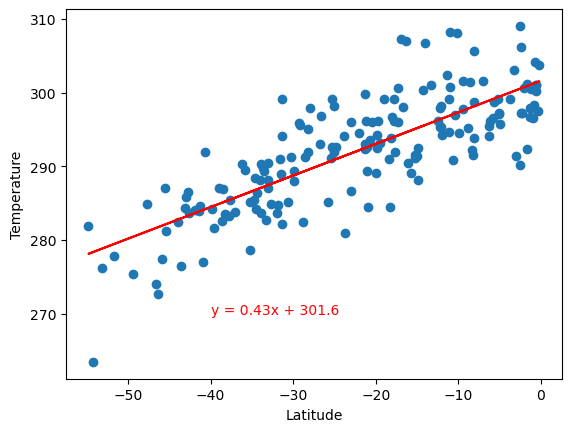

In [24]:
# Linear regression on Southern Hemisphere
latitude_s = southern_hemi_df["Lat"].values
temperature_s = southern_hemi_df["Max Temp"].values

line_eq = regression(latitude_s, temperature_s)


plt.annotate(line_eq, (-40,270), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

**Discussion about the linear relationship:**
Based on the results from the linear regression we can conclude that the model is not a good fit for the data in the northen hemisphere since the R squared value is close to 0. This means that the variation of the data is not explained well by the model.
But, the model is able to explain some variation in the data for the southern hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r^2 values is 0.0030830218917134054


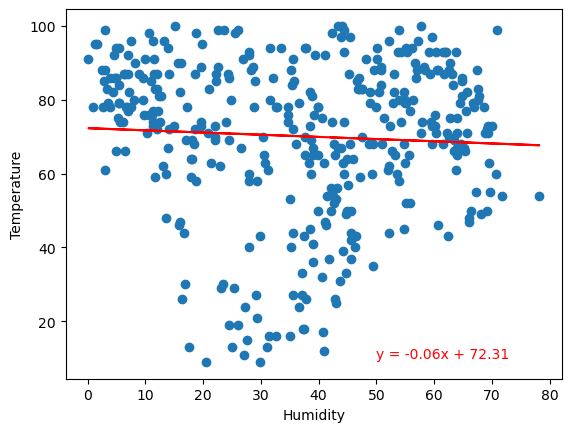

In [25]:
# Northern Hemisphere
humidity_n = northern_hemi_df["Humidity"].values

line_eq = regression(latitude_n, humidity_n)


plt.annotate(line_eq, (50,10), fontsize=10, color="red")
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.show()

The r^2 values is 0.004893174438801681


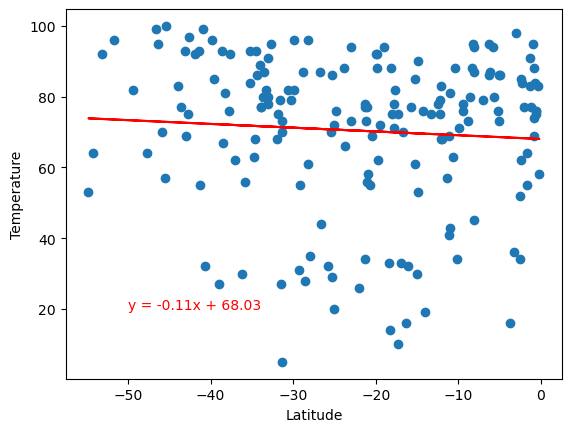

In [26]:
# Southern Hemisphere
humidity_s = southern_hemi_df["Humidity"].values

line_eq = regression(latitude_s, humidity_s)


plt.annotate(line_eq, (-50,20), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

**Discussion about the linear relationship:** 
This model is not a good description of the data because in both the northern and southern hemispheres the R squared values are very close to zero. This means that the model does not explain the variation in the data

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 values is 0.020298588745704966


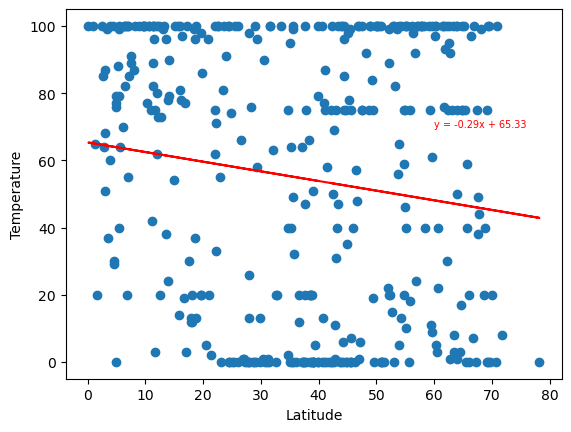

In [28]:
# Northern Hemisphere
cloudiness_n = northern_hemi_df["Cloudiness"].values

line_eq = regression(latitude_n, cloudiness_n)


plt.annotate(line_eq, (60,70), fontsize=7, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

The r^2 values is 0.0231751046380195


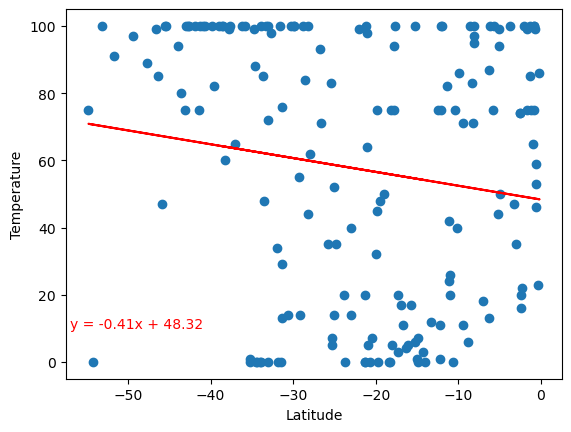

In [29]:
# Southern Hemisphere
cloudiness_s = southern_hemi_df["Cloudiness"].values

line_eq = regression(latitude_s, cloudiness_s)


plt.annotate(line_eq, (-57,10), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

**Discussion about the linear relationship:** 
This model is not a good fit for the data because both the northern or southern hemispheres have R squared values near to zero, which means that the model does not explain the variation in the data. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 values is 0.010355378042912752


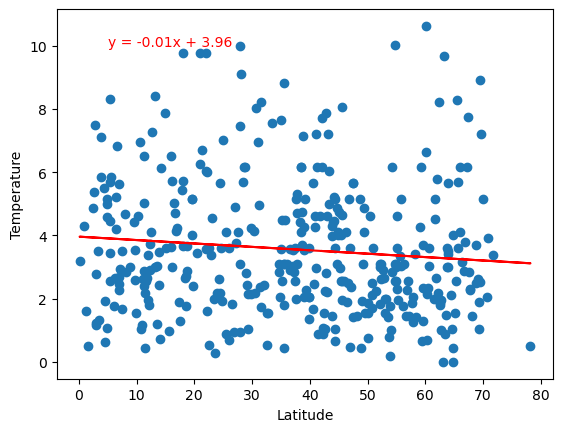

In [35]:
#Northern Hemisphere
wind_speed_n = northern_hemi_df["Wind Speed"].values

line_eq = regression(latitude_n, wind_speed_n)

plt.annotate(line_eq, (5,10), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

The r^2 values is 0.027559887646996035


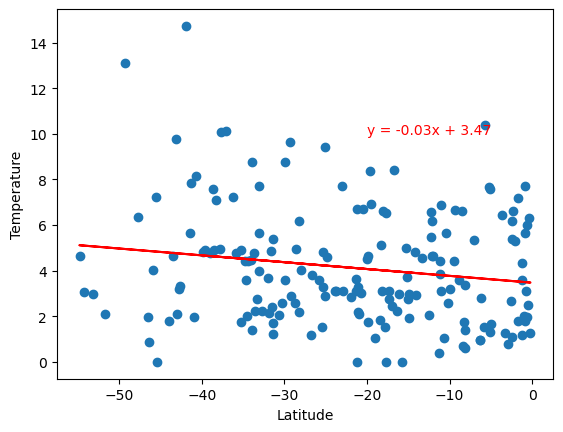

In [37]:
# Southern Hemisphere
wind_speed_s = southern_hemi_df["Wind Speed"].values

line_eq = regression(latitude_s, wind_speed_s)

plt.annotate(line_eq, (-20,10), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

**Discussion about the linear relationship:** 
This model is not a good fit for the data because both the northern or southern hemispheres have R squared values near to zero, which means that the model does not explain the variation in the data. 